## Estimador logistco para parâmentros inciais de SIRC

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# estimador logistico 1
def initial_guess(C):
    """
    Estima os parâmetros iniciais da curva logística usando 3 pontos dos dados C.

    input:
    C : array-like

    Output:
    [K, r, A] ou None
    """
    C = np.array(C)
    n = len(C)
    
    if n <= 5:
        return None

    for i in range(n - 5):
        k1 = i
        k3 = n - 1
        k2 = (k1 + k3) // 2
        m = k2 - k1
        if m < 1 or any(np.isnan(C[[k1, k2, k3]])):
            continue

        C1, C2, C3 = C[k1], C[k2], C[k3]


        q = C2**2 - C3 * C1
        if q <= 0:
            continue
        p = C1 * C2 - 2 * C1 * C3 + C2 * C3
        if p <= 0:
            continue

        K = C2 * p / q

        try:
            r = np.log((C3 * (C2 - C1)) / (C1 * (C3 - C2))) / m
        except (ZeroDivisionError, ValueError):
            continue
        if r < 0:
            continue

        try:
            A = ((C3 - C2)*(C2 - C1)/q) * \
                ((C3 * (C2 - C1)) / (C1 * (C3 - C2)))**((k3 - m)/m)
        except (ZeroDivisionError, ValueError):
            continue
        if A <= 0:
            continue

        return [K, r, A]

    return None

In [7]:

# estimador logistico 2
def logistic(t, K, r, A):
    return K / (1 + A * np.exp(-r*t))

def logistic_fit(C):
    t = np.arange(len(C))
    C = np.array(C)
    p = [max(C)*2, 0.1, 10]  # Chute inicial: K, r, A
    try:
        param, _ = curve_fit(logistic, t, C, p0=p, maxfev=1000)
        return param # retorna [K, r, A]
    except RuntimeError:
        return None


NameError: name 'fit' is not defined

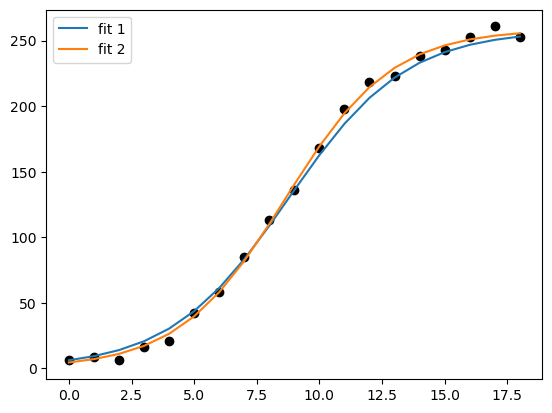

In [8]:
dados = [2, 3, 6, 11, 20, 30,50,70, 100,130,160,190,210,220,230,240,245,248,250]
dados=dados+15*np.random.rand(len(dados))
t=np.arange(len(dados))

K1,r1,A1 = initial_guess(dados)
K2, r2, A2=logistic_fit(dados)

y1=logistic(t,K1,r1,A1)
y2=logistic(t,K2,r2,A2)

plt.plot(t,dados,'ko')
plt.plot(t,y1,label='fit 1')
plt.plot(t,y2,label='fit 2')
plt.legend()

fit.report

In [1]:
# Cálculo de R²
residuals = dados - y1
ss_res = np.sum(residuals**2)
ss_tot = np.sum((dados - np.mean(dados))**2)
r_squared = 1 - (ss_res / ss_tot)

# Erros padrão dos parâmetros (a partir da matriz de covariância)
rmse = np.sqrt(np.mean(residuals**2))

print(f'R² (Coeficiente de Determinação) = {r_squared:.4f}')
print(f'RMSE (Raiz do Erro Quadrático Médio) = {rmse:.4f}')


residuals = dados - y2
ss_res = np.sum(residuals**2)
ss_tot = np.sum((dados - np.mean(dados))**2)
r_squared = 1 - (ss_res / ss_tot)

# Erros padrão dos parâmetros (a partir da matriz de covariância)
rmse = np.sqrt(np.mean(residuals**2))
print(f'R² (Coeficiente de Determinação) = {r_squared:.4f}')
print(f'RMSE (Raiz do Erro Quadrático Médio) = {rmse:.4f}')

NameError: name 'dados' is not defined